# 소규모 데이터셋에서 컨브넷 사용

## 개 vs. 고양이

## 데이터 내려받기

`https://www.kaggle.com/c/dogs-vs-cats/data` (계정 만들기)

![cats_vs_dogs_samples](https://s3.amazonaws.com/book.keras.io/img/ch5/cats_vs_dogs_samples.jpg)

25,000개의 강아지와 고양이 이미지(클래스마다 12,500개)  

**`모든 이미지를 사용하지 않고 일부 데이터만 이용.`**

클래스별 1,000개의 샘플로 이루어진 훈련 세트  

클래스별 500개의 샘플로 이루어진 검증 세트  

클래스별 500개의 샘플로 이루어진 테스트 세트로 데이터 재구성

In [1]:
import keras
import os, shutil

Using TensorFlow backend.


In [2]:
# 원본 데이터셋을 압축 해제한 디렉터리 경로
original_dataset_dir = './data/dogs-vs-cats/train'

# 소규모 데이터셋을 저장할 디렉터리
base_dir = './data/cats_and_dogs_small'
if os.path.exists(base_dir):  # 반복 실행하는 경우 기존 디렉토리 삭제
    shutil.rmtree(base_dir)
os.mkdir(base_dir)

# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 고양이 이미지를 validation_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 고양이 이미지를 test_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 validation_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 test_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

### 데이터 확인

In [3]:
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))

훈련용 고양이 이미지 전체 개수: 1000


In [4]:
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))

훈련용 강아지 이미지 전체 개수: 1000


In [5]:
print('검증용 고양이 이미지 전체 개수:', len(os.listdir(validation_cats_dir)))

검증용 고양이 이미지 전체 개수: 500


In [6]:
print('검증용 강아지 이미지 전체 개수:', len(os.listdir(validation_dogs_dir)))

검증용 강아지 이미지 전체 개수: 500


In [7]:
print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))

테스트용 고양이 이미지 전체 개수: 500


In [8]:
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

테스트용 강아지 이미지 전체 개수: 500


## 네트워크 구성하기

- mnist 보다 이미지가 크고 복잡한 문제이기 때문에 네트워크를 좀 더 크게 생성   
--> `Conv2D` + `MaxPooling2D` 단계를 하나 더 추가 

- 네트워크의 용량을 늘리고 `Flatten` 층의 크기가 너무 커지지 않도록 특성 맵의 크기를 줄임

- 150 × 150 크기의 입력으로 시작해서 `Flatten` 층 이전에 7 × 7 크기의 특성 맵으로 감소

- 특성 맵의 깊이는 네트워크에서 점진적으로 증가하지만(32에서 128까지), 특성 맵의 크기는 감소(150 × 150에서 7 × 7까지)  
--> 이는 거의 모든 컨브넷에서 볼 수 있는 전형적인 패턴

In [9]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(0.5)) 
#신경망에서는 나쁜 데이터도 학습에 사용하는 경우가 많기 때문에 노이즈를 섞어 50%를 0으로 바꾼다. -> 일반화를 더 잘 시킴

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [11]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

## 데이터 전처리

데이터는 네트워크에 주입되기 전에 부동 소수 타입의 텐서로 적절하게 전처리되어 있어야 함.  

지금은 데이터가 JPEG 파일로 되어 있으므로 네트워크에 주입하려면 다음의 과정을 따름

1.	사진 파일을 읽기
2.	JPEG 콘텐츠를 RGB 픽셀 값으로 디코딩
3.	부동 소수 타입의 텐서로 변환
4.	픽셀 값(0에서 255 사이)의 스케일을 [0, 1] 사이로 조정(신경망은 작은 입력 값을 선호)

케라스는 이런 단계를 자동으로 처리하는 유틸리티를 가지고 있음.

`ImageDataGenerator` 클래스는 디스크에 있는 이미지 파일을 전처리된 배치 텐서로 자동으로 바꾸어준다

### 파이썬 제너레이터

In [12]:
def square_numbers(nums):
    result = []
    for i in nums:
        result.append(i*i)
    return result

In [13]:
square_numbers([1,2,3,4])

[1, 4, 9, 16]

In [14]:
def square_numbers1(nums):
    for i in nums:
        yield i*i

In [15]:
nums = square_numbers1([1,2,3,4])
nums

<generator object square_numbers1 at 0x0000028205A8FCF0>

In [16]:
next(nums)

1

[참고자료 : image processing - keras document](https://keras.io/preprocessing/image/)

In [17]:
from keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255로 스케일을 조정합니다
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 변경
        target_size=(150, 150),
        batch_size=20,
        # 이진분류이므로 'binary' / 다중 분류의 경우 'categorical'
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### 데이터 확인

In [18]:
# 하나의 배치에 들어 있는 이미지 값들
validation_generator[0][0].shape

(20, 150, 150, 3)

In [19]:
# 하나의 배치에 들어 있는 이미지 라벨 값들
validation_generator[0][1].shape

(20,)

In [20]:
aa = validation_generator[0]

In [76]:
# 첫번째 배치 shape
aa[0].shape

(20, 150, 150, 3)

In [77]:
# 첫번째 배치 첫번째 데이터 첫번째 채널 확인
aa[0][0,:,:,0]

array([[0.28235295, 0.2784314 , 0.25490198, ..., 0.09411766, 0.09019608,
        0.09411766],
       [0.2627451 , 0.26666668, 0.25490198, ..., 0.08627451, 0.09411766,
        0.09411766],
       [0.26666668, 0.25882354, 0.25882354, ..., 0.09019608, 0.09411766,
        0.09411766],
       ...,
       [0.65882355, 0.7607844 , 0.9450981 , ..., 0.76470596, 0.7725491 ,
        0.8000001 ],
       [0.6627451 , 0.6862745 , 0.85098046, ..., 0.76470596, 0.7725491 ,
        0.8000001 ],
       [0.7372549 , 0.68235296, 0.79215693, ..., 0.76470596, 0.7725491 ,
        0.8000001 ]], dtype=float32)

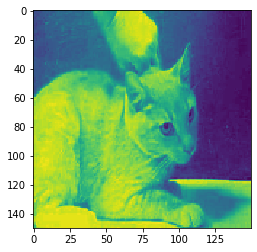

In [78]:
import matplotlib.pyplot as plt

plt.imshow(aa[0][0,:,:,0])

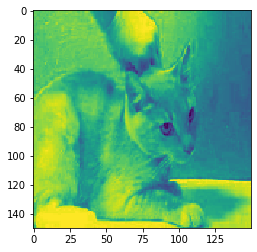

In [79]:
# 첫번째 배치 첫번째 데이터 세번째 채널 확인

plt.imshow(aa[0][0,:,:,2])

### 제너레이터의 출력 확인

### !!주의!!

for loop 사용시 train_generator 객체는 배치를 무한정 만들어 내면 결과를 반환한다.
따라서 break 사용 필수.

In [37]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


### 모델 훈련

- 제너레이터를 사용하여 데이터를 주입할 경우 `fit_generator` 메서드를 사용한다

- `fit_generator` 메서드는 첫 번째 매개변수로 입력과 타깃의 배치를 끝없이 반환하는 파이썬 제너레이터를 받는다(train_generator)

*for loop에서와 마찬가지로 데이터가 끝없이 생성되기 때문에, 케라스 모델에 하나의 에포크를 정의하기 위해 제너레이터로부터 얼마나 많은 샘플을 뽑을 것인지 지정해야 한다.
--> `steps_per_epoch` 매개변수에서 이를 설정*

- 제너레이터로부터 `steps_per_epoch` 개의 배치만큼 뽑은 다음, 즉 `steps_per_epoch` 횟수만큼 경사 하강법 단계를 실행한 다음에 훈련 프로세스는 다음 에포크로 넘어가게 된다. 

- 20개의 샘플이 하나의 배치이므로 2,000개의 샘플을 모두 처리하도록 100으로 설정

- `fit` 메서드와 마찬가지로 `validation_data` 매개변수 전달 가능. 

- 이 매개변수에는 데이터 제너레이터도 가능하지만 넘파이 배열의 튜플도 가능 

- `validation_data`로 제너레이터를 전달하면 검증 데이터의 배치를 끝없이 반환하므로 `validation_steps` 매개변수에 지정해야 한다

- loss: 매 에포크 마다의 훈련 손실값
- acc: 매 에포크 마다의 훈련 정확도
- val_loss: 매 에포크 마다의 검증 손실값
- val_acc: 매 에포크 마다의 검증 정확도

In [81]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 77s 768ms/step - loss: 0.6953 - acc: 0.5060 - val_loss: 0.6839 - val_acc: 0.5210
Epoch 2/30
100/100 [==============================] - 78s 783ms/step - loss: 0.6926 - acc: 0.5075 - val_loss: 0.7000 - val_acc: 0.5070
Epoch 3/30
100/100 [==============================] - 81s 814ms/step - loss: 0.6635 - acc: 0.6090 - val_loss: 0.6071 - val_acc: 0.6380
Epoch 4/30
100/100 [==============================] - 82s 821ms/step - loss: 0.6226 - acc: 0.6620 - val_loss: 0.5792 - val_acc: 0.6770
Epoch 5/30
100/100 [==============================] - 81s 809ms/step - loss: 0.5884 - acc: 0.6930 - val_loss: 0.6514 - val_acc: 0.6870
Epoch 6/30
100/100 [==============================] - 81s 806ms/step - loss: 0.5593 - acc: 0.7090 - val_loss: 0.5360 - val_acc: 0.6500
Epoch 7/30
100/100 [==============================] - 78s 784ms/step - loss: 0.5234 - acc: 0.7315 - val_loss: 0.5180 - val_acc: 0.6910
Epoch 8/30
100/100 [==============================] - 7

### 모델 저장

In [ ]:
model.save('cats_and_dogs_small_1.h5')

### 모델의 손실과 정확도 그래프

In [ ]:
import matplotlib.pyplot as plt

In [60]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
from IPython.display import display
import PIL

In [62]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15815807922736183660
]


In [63]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

[]

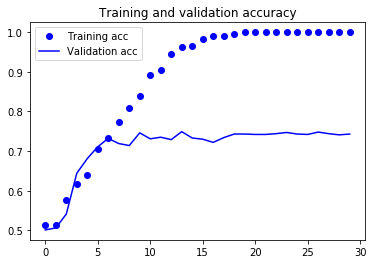

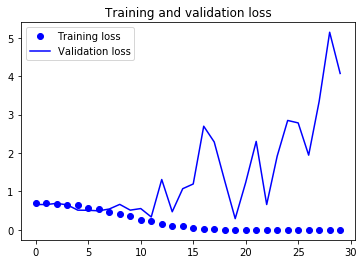

In [58]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

- 과대적합의 특성을 볼 수 있음

- 훈련 정확도가 시간이 지남에 따라 선형적으로 증가해서 거의 100%에 도달

- 반면 검증 정확도는 70-72%에서 멈춤

- 검증 손실은 다섯 번의 에포크만에 최소값 도달

- 비교적 훈련 샘플의 수(2,000개)가 적기 때문에 과대적합이 가장 중요한 문제